In [1]:
from plotbee.video import Video
from plotbee.body import Body
import plotbee.videoplotter as vplt
import glob
import os
from ipywidgets import interact
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 20]


VIDEO_FORMAT="/mnt/storage/Gurabo/datasets/gurabo10/mp4/col02/{}.mp4"
SKELETON_FORMAT = "/mnt/storage/work/jchan/col02_2019/hungarian_tag_{}_skeleton.json"
SKELETON_PATTERN = "/mnt/storage/work/jchan/col02_2019/*.json"

MODEL_PATH = "mobilenet_pollen90x90.tf"

def get_videoname(file):
    _, filename = os.path.split(file)
    return filename[14:-14]

def fix_skeleton(video):
    for frame in video:
        for body in frame:
            if (2 in body._parts) and (3 in body._parts):
                body._center_part = 2
                body._angle_conn= [2, 3]
    return video

skeleton_files = glob.glob(SKELETON_PATTERN)
videos = [get_videoname(sk) for sk in skeleton_files]

### Load Video

In [2]:
VIDEO=None

@interact
def load_video(video_name=videos, load=False):
    global VIDEO
    if load:
        print("Loading video data...")
        print("Please do not change the video until this widget shows the video.")
        VIDEO = Video.load(SKELETON_FORMAT.format(video_name))
        VIDEO = fix_skeleton(VIDEO)
        VIDEO.load_video(VIDEO_FORMAT.format(video_name))
        vplt.imshow(VIDEO[0])

interactive(children=(Dropdown(description='video_name', options=('31_02_R_190720110000', '107_02_R_1908101100…

### Pollen Processing

In the command line:
```
pb pollen --file <skeleton_file> --video <video_file> --model <model_path> --workers <n_workers>

```

In [3]:
#Todo:  scale=1.6
VIDEO.process_pollen(MODEL_PATH)

100%|██████████| 17996/17996 [00:01<00:00, 17710.54it/s]


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')] [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')][PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]1  
01

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')] 0


pollen_temp/pollen_temp_0.json:   0%|          | 0/17996 [00:00<?, ?it/s]

Something wrong with the video.


100%|██████████| 71984/71984 [00:09<00:00, 7909.98it/s] 


### Visualize some Pollen Predictions

In [5]:
Body.width = 360
Body.height = 360

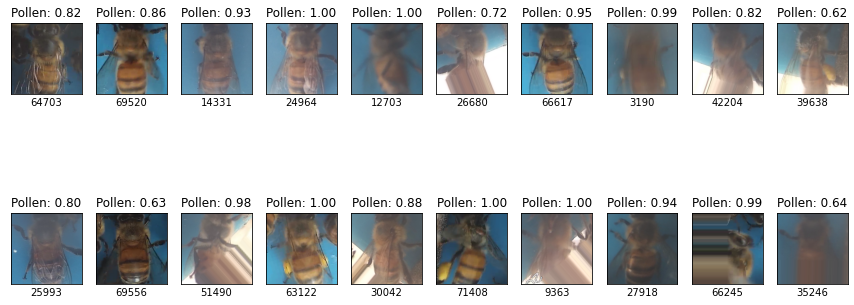

In [6]:
from random import shuffle

pollen_bees = list()

for frame in VIDEO:
    for body in frame:
        if body.pollen:
            pollen_bees.append(body)
            
shuffle(pollen_bees)
vplt.contact_sheet(pollen_bees[:20])

### Export Dataset

In the command line:
```
pb export --pollen --output_folder <output_foldes> --file <skeleton_file> --width <image_width> --height <image_height> --size <limit_size>

```

In [7]:
Body.width = 512
Body.height = 512
Body.scale = 2.0

Body.out_width = 90
Body.out_height = 90

VIDEO.export_pollen("output_folder", limit=200)

  0%|          | 0/200 [00:00<?, ?it/s]

6_02_R_190819100000


100%|██████████| 200/200 [01:34<00:00,  2.12it/s]
